In [ ]:
import ROOT
f = ROOT.TFile.Open("output.ntuple.root")
output = f.Get("output")
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
output.Draw("nhits")
c.Draw()

In [ ]:
import ROOT
f = ROOT.TFile.Open("muon_water_trig2.0.1000.root")
output = f.Get("output")
c2 = ROOT.TCanvas("Muon NHits","Muon NHits",800,600)
output.Draw("nhits")
c2.Draw()

In [ ]:
import ROOT
f = ROOT.TFile.Open("muon_water_trig2.0.1000_trk.root")
output = f.Get("output")
c3 = ROOT.TCanvas("Muon NHits 1000 Evts","Muon NHits 1000 Events",800,600)
output.Draw("nhits", "nhits<300")
c3.Draw()

In [ ]:
output.Print()

In [ ]:
import ROOT
c3 = ROOT.TCanvas("mcPEx","mcPEx",800,600)
output.Draw("mcPEx", "nhits<300")
c3.Draw()
c4 = ROOT.TCanvas("mcPEz","mcPEz",800,600)
output.Draw("mcPEz", "nhits<300")
c4.Draw()

c5 = ROOT.TCanvas("mcPEy","mcPEy",800,600)
output.Draw("mcPEy", "nhits<300")
c5.Draw()

In [ ]:
c5 = ROOT.TCanvas("mcpdg","mcpdg",800,600)
output.Draw("mcpdg", "nhits < 300")
c5.SetLogy();
c5.Draw()

In [ ]:
c5 = ROOT.TCanvas("trackPDG","trackPDG",800,600)
output.Draw("trackPDG", "nhits < 300")
c5.SetLogy();
c5.Draw()

In [ ]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
df = ROOT.RDataFrame("output","muon_water_trig2.0.1000_trk.root")
nhits = df.AsNumpy(columns=["nhits"])["nhits"]
print(nhits.shape)
plt.hist(nhits, bins=np.arange(-0.5,255.5,10))
plt.show()

In [ ]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
df = ROOT.RDataFrame("output","muon_water_trig2.0.1000_trk.root")
df = df.Filter("nhits < 250")
mcpdg = df.AsNumpy(columns=["mcpdg"])["mcpdg"]
print(mcpdg)
plt.hist(mcpdg,bins=np.arange(-14,14,1))
plt.show()

Reading in file  muon_water_trig2.0.1000_trk.root


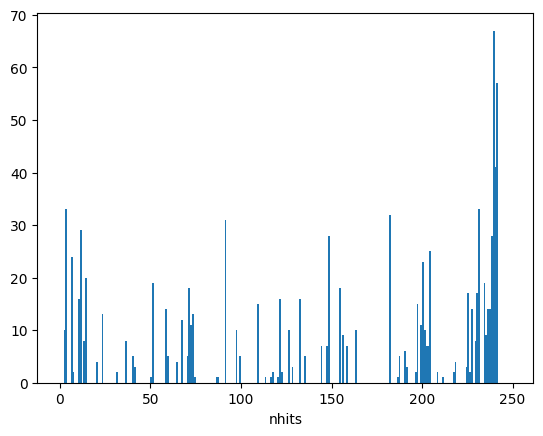

In [16]:
import uproot
import numpy  as np
import matplotlib.pyplot as plt

print('Reading in file ',"muon_water_trig2.0.1000_trk.root")

nhits,pe,time =  np.array([]),np.array([]),np.array([])

cut_cond = "( (nhits>0) & (nhits<250) )"

for array1 in uproot.iterate("muon_water_trig2.0.1000_trk.root:output",["nhits","triggerTime"],cut=cut_cond):
    _E,_T = array1["nhits"],array1["triggerTime"] 
    nhits.resize(len(nhits)+len(_E))
    nhits[-len(_E):] = _E
    time.resize(len(time)+len(_T))
    time[-len(_T):] = _T

plt.hist(nhits, bins=np.arange(0,250,1))
plt.xlabel("nhits")
plt.show()